# Classifying potential bank customers for marketing purposes

- By John Le, STAT 650



## ABSTRACT (Summarizes motivation, methodology, findings, and implications up to 200 words.)
	
The motivation for this project is to analyze a dataset comprising of potential local customers in Portugal who either signed up for a bank deposit or did not. Specifically, the dataset focuses on the demographics of these individuals and correlates them with successful deposits resulting from a telemarketing campaign for a Portuguese bank. Implications for marketing involve appealing to potential consumers to invest money in the bank's services, thereby boosting revenue for the bank. Marketing encompasses various forms such as email, telemarketing, and phone outreach, among others, constituting a vital aspect of business promotion. The methods employed to present the outcomes of phone telemarketing involve logistic regression and random forests, enhancing predictive capabilities to assess the efficacy of marketing campaigns using customer data. Logistic regression and Random Forest models will be utilized to evaluate if predictions regarding customer success in bank deposits can effectively serve future marketing objectives. The intent is to ascertain how a customer is correlated to being prone to phone telemarketing based on their socieconomic traits within the available data, thereby offering valuable insights into optimizing marketing strategies.


## INTRODUCTION: 

Financial activity is largely facilitated through banks through loans and deposits then subsequently paid with interest for it's customers. Banks require money from clients to fuel financial activities then paid back with interest. Marketing helps promote the banks'products and services for potential customers. Effective marketing attracts it's target audience to buy products or services from specific firms if it's enticing enough to the customer. Successful marketing depends on the target audience's receptivity to the product as well[4]. The interested parameters that represent customer receptvity are socioeconomic factors including job type, marital status and other financial indicators that would indicate receptivity to marketing strategies. 

This dataset is used in a prior paper by Sérgio Moro, P. Cortez, P. Rita involving other predictive models such as neural networks and SVMs. The paper details success rate of financial products being telemarketed to potential customers including but not limited to seller skills, quotas, or other marketing tactics [1]. Even though the data from a Portugeuse bank, it can still provide insight about customer behavior towards improving marketing tactics. We want to see if we can predict success of deposit sign ups through telemarketing campaign on customers’ demographics as features. Simply put, we want to measure customers' susceptibility to marketing tactics based on customers' demographics and financial factors that would influence decision making. We want to accurately predict with an 90% accuracy rate from models can predict the outcomes based on those factors.


   # bank client data:
  Desired Predictors
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   
   TARGET Response: 
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [24]:
### Reading the data and checking for NA in data and checking for any EDA and other traits
### Will now start hiding the code when exporting to html

from pandas import read_csv

df = read_csv('port_bank_data.csv', sep = ";")
columns_to_drop = ['day', 'month', 'duration', 'pdays', 'previous', 'poutcome', 'contact']
new_df = df.drop(columns=columns_to_drop, axis=1)



## Data Handling and Exploratory Data Analysis 
-   Data source: where/how to get the data,
-       Data description
-       Review data: Checking missing values and outliers.
-	Transform the data set if necessary for data analysis.


This data was obtained from the UCI Machine Learning Repository website [5]. The data was then filtered for both numeric and categorical data that outline the customers’ demographics as features and the response being successful deposits classified as yes and no summing up to approximately 41,000 entries. The data is from a Portuguese bank that lists observations that outline a customer’s features listed as: job type, education, marital status, bank balance in euros, age, home loan status, default status, personal loan status, and number of times contacted through telemarketing. The overall impact of phone telemarketing was not that substantial on customers but there are inferences about to be made on customer demographics. There are no missing values other than certain categorical variables yielding classifications being ‘None’ or ‘unknown’. Those types of values have been filtered from the data set as well as other features that won’t be used in the upcoming models. Each observation describes a prospective customer with their respective features with the response category grouped as yes or no. As a preliminary observation from the collected data, a lot of potential customers didn’t put down a deposit for the bank’s services. This results in imbalanced data that shows the conclusion that phone telemarketing to customers did not yield much success.

The numerical features (Age, Balance, and Campaign) seem to display normal distributions so we can assume little to no abnormalities aside from right skewing thus transforming the data won't be necessary when training into the logistic regression and random forest. The numerical variables and categorical variables will require scalar standardization and one hot encoding respectively. However, some of the categorical variables display imbalanced representation in the bar graphs below. For the Job titles category, there are more than 12 classifications of job status with half of those being deemed as minority classifications. Since those job categoies are not significant enough, those minority categories will be combined to make a large enough category called 'Other'. The other categorical features deemed fine as is.


In [8]:
# Newly filtered dataset
# Define the values to drop and the columns to check
drop_val = ['unknown', 'None']
col_to_check = ['job', 'education']

# Create a boolean mask for rows to drop
mask = ~(new_df[col_to_check].isin(drop_val)).any(axis=1)

# Apply the mask to filter the DataFrame
new_df_filtered = new_df[mask]

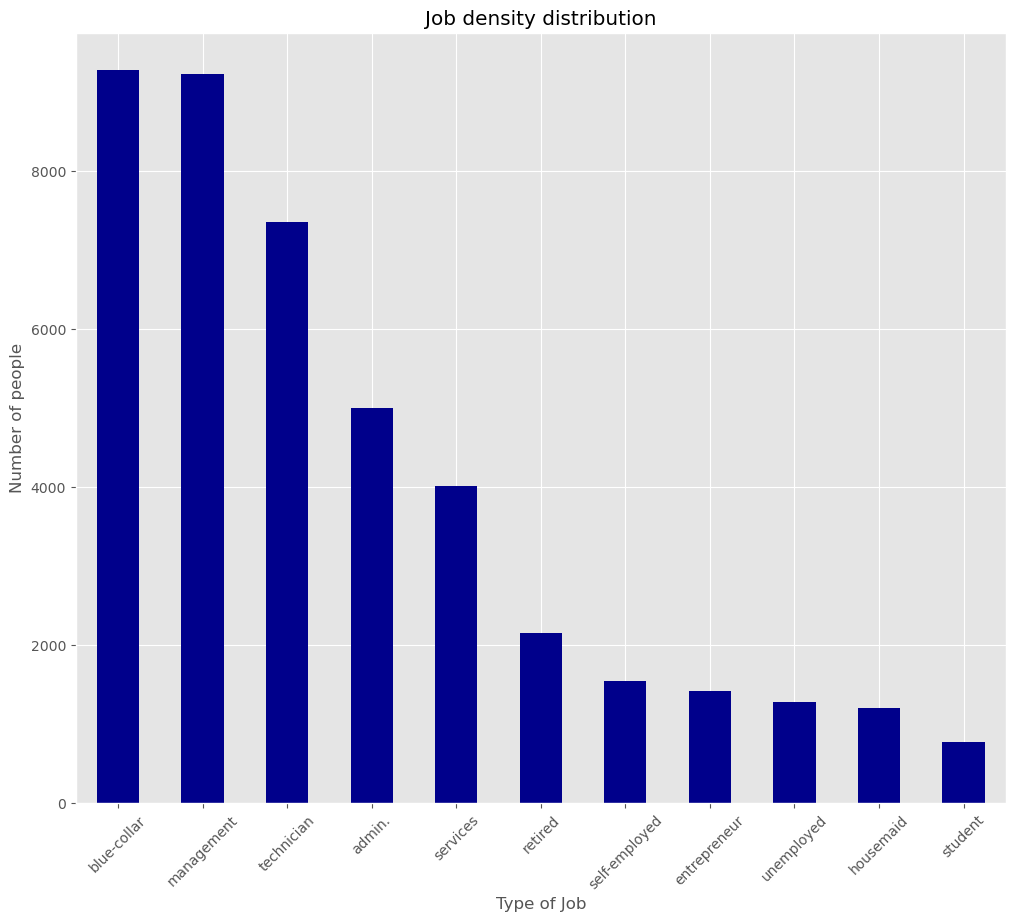

In [13]:
# For more successful outcomes, we will be omitting the unknown outcome due to interfering effect in classfication
# and logistic regression methods. We will be trimming the entries that only have outcome of Yes and No so that it's better undertsood
import matplotlib.pyplot as plt 
import numpy as np 
import math
import seaborn as sns
from matplotlib import style

# Histogram for jobs with labels

value_counts = new_df_filtered['job'].value_counts()

plt.figure(figsize=(12,10))
value_counts.plot(kind='bar', color='darkblue')
plt.xticks(rotation=45)
plt.title("Job density distribution")
plt.ylabel("Number of people")
plt.xlabel("Type of Job")

plt.show()

C:\Users\14699\AppData\Local\Temp\ipykernel_9220\66398593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['job_class'] = new_df_filtered['job'].map(classification_map)


Text(0.5, 0, 'Job classification')

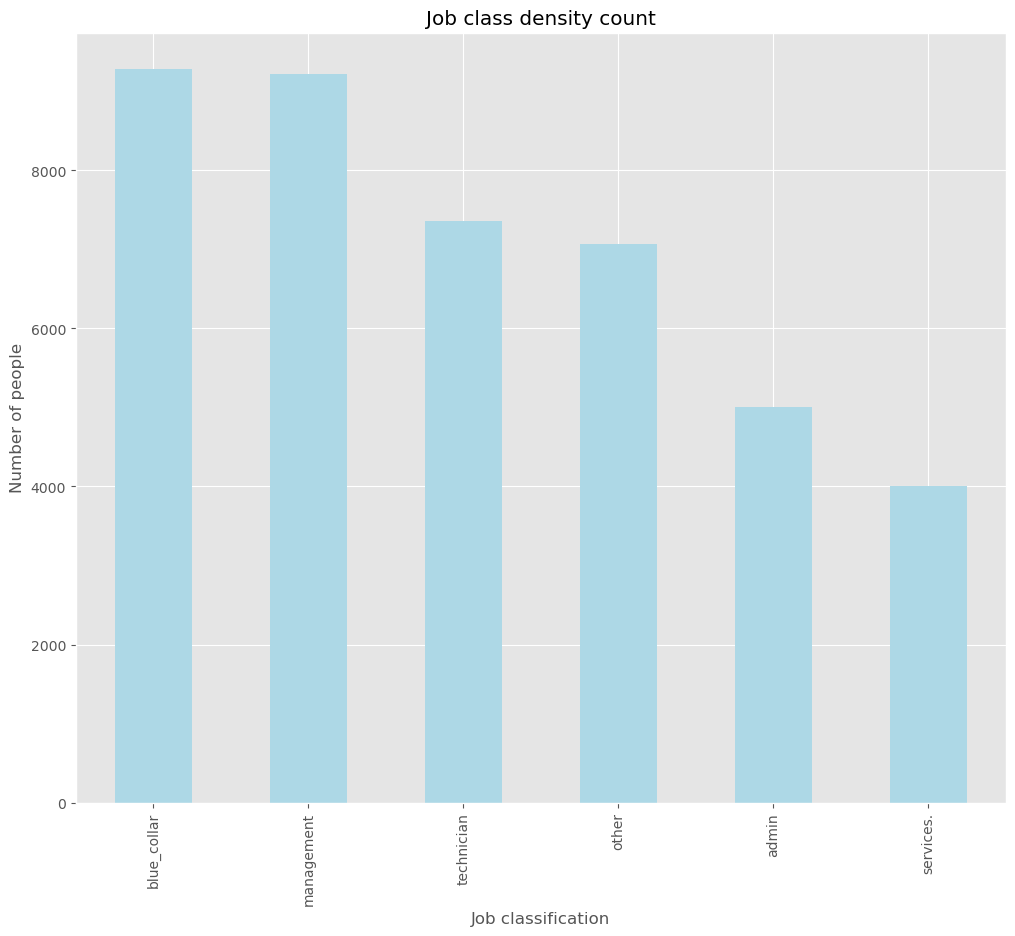

In [14]:
# Must alter the jobs category by combining the last few columns because those groups may not be statistically significant
# Will need to be grouped together to offset the imbalanced data.


# Using a map function to reclassify the last 6 minority categories as 'other'
# Define a mapping of current classifications to desired classifications
classification_map = {'retired': 'other', 'self-employed': 'other', 'entrepreneur' : 'other', 'housemaid': 'other',
                      'student': 'other', 'blue-collar' : 'blue_collar', 'management': 'management', 'technician': 'technician',
                      'admin.': 'admin', 'services': 'services.'}

                      # Use the map function to create a new column 'GenderCode' based on the mapping
new_df_filtered['job_class'] = new_df_filtered['job'].map(classification_map)

job_value_counts = new_df_filtered['job_class'].value_counts()

                    # we will be using this classfication from now on and we'll be dropping the original

plt.figure(figsize=(12,10))
job_value_counts.plot(kind='bar', color='lightblue')
plt.title("Job class density count")
plt.ylabel("Number of people")
plt.xlabel("Job classification")


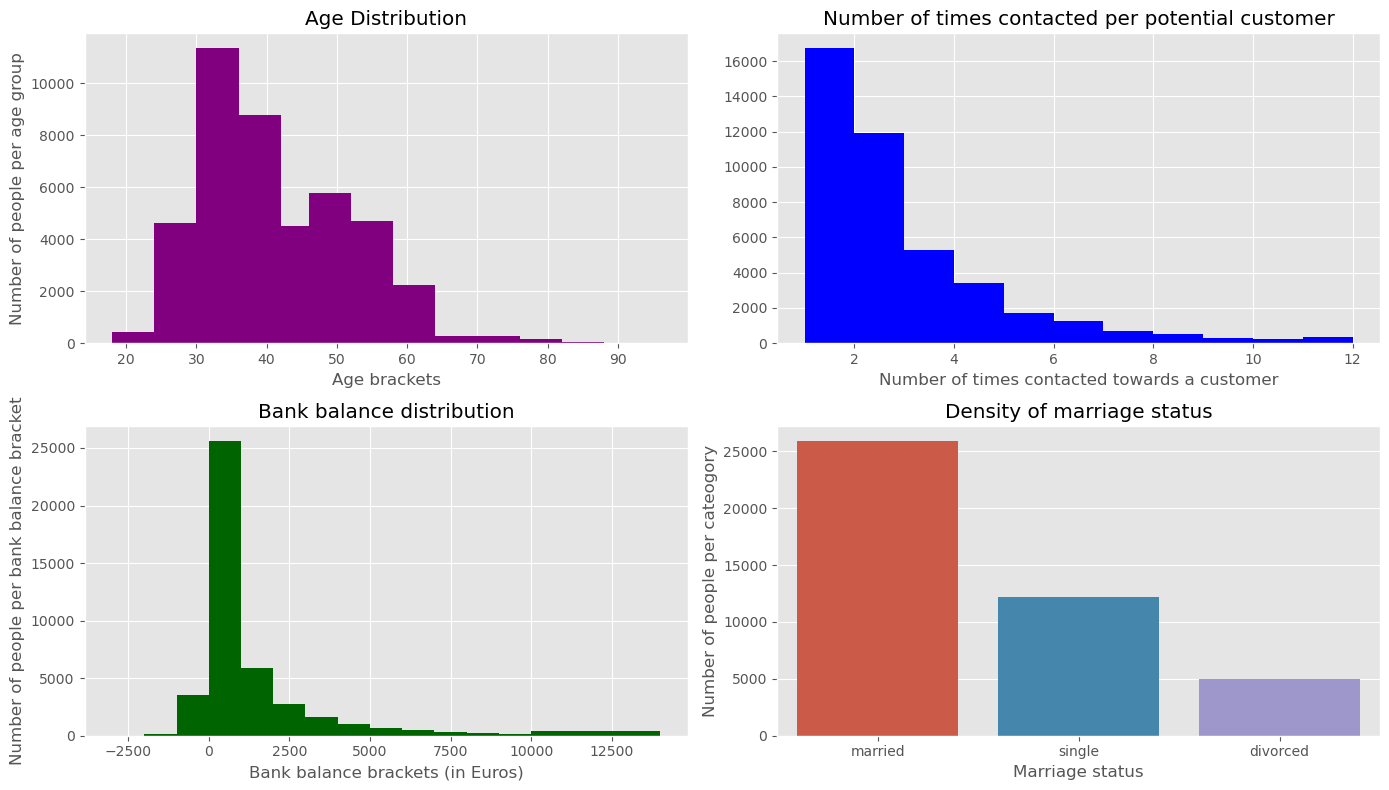

In [15]:
                        ## Graphs for Age, Campaign contact, Bank balance, and Marriage Status

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

                                             # Subplot 1: Histogram with age
# This is comprised of a sine graph and line graph
agefig = axes[0,0] # Storing the placed graph for this coordinate
style.use('ggplot')

bins = [18, 24, 30, 36, 42, 46, 52, 58, 64, 70, 76, 82, 88, 96]
agefig.hist(new_df_filtered['age'], bins=bins, color='purple') 
agefig.set_ylabel('Number of people per age group')
agefig.set_xlabel('Age brackets')
agefig.title.set_text('Age Distribution')

                                     # Subplot 2: Histogram with Campaign Contact number
contfig = axes[0,1]
bins = [1,2,3,4,5,6,7,8,9,10,11,12]
contfig.hist(new_df_filtered['campaign'], bins=bins, color='blue')
contfig.set_xlabel('Number of times contacted towards a customer')
contfig.title.set_text('Number of times contacted per potential customer')

                                     # Subplot 3: Bank balance Histogram

bankbalfig = axes[1,0]
brackets = [-3000, -2000, -1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 14000]
bankbalfig.hist(new_df_filtered['balance'], bins=brackets, color='darkgreen')
bankbalfig.set_ylabel('Number of people per bank balance bracket')
bankbalfig.set_xlabel('Bank balance brackets (in Euros)')
bankbalfig.title.set_text('Bank balance distribution')


                                     # Subplot 4: Marital Status Bar Graph
marriagefig = axes[1,1]
sns.countplot(x=new_df_filtered['marital'], ax=axes[1,1])
marriagefig.set_title('Education level')
marriagefig.title.set_text("Density of marriage status")
marriagefig.set_xlabel("Marriage status")
marriagefig.set_ylabel("Number of people per cateogory")

plt.tight_layout()
plt.show()

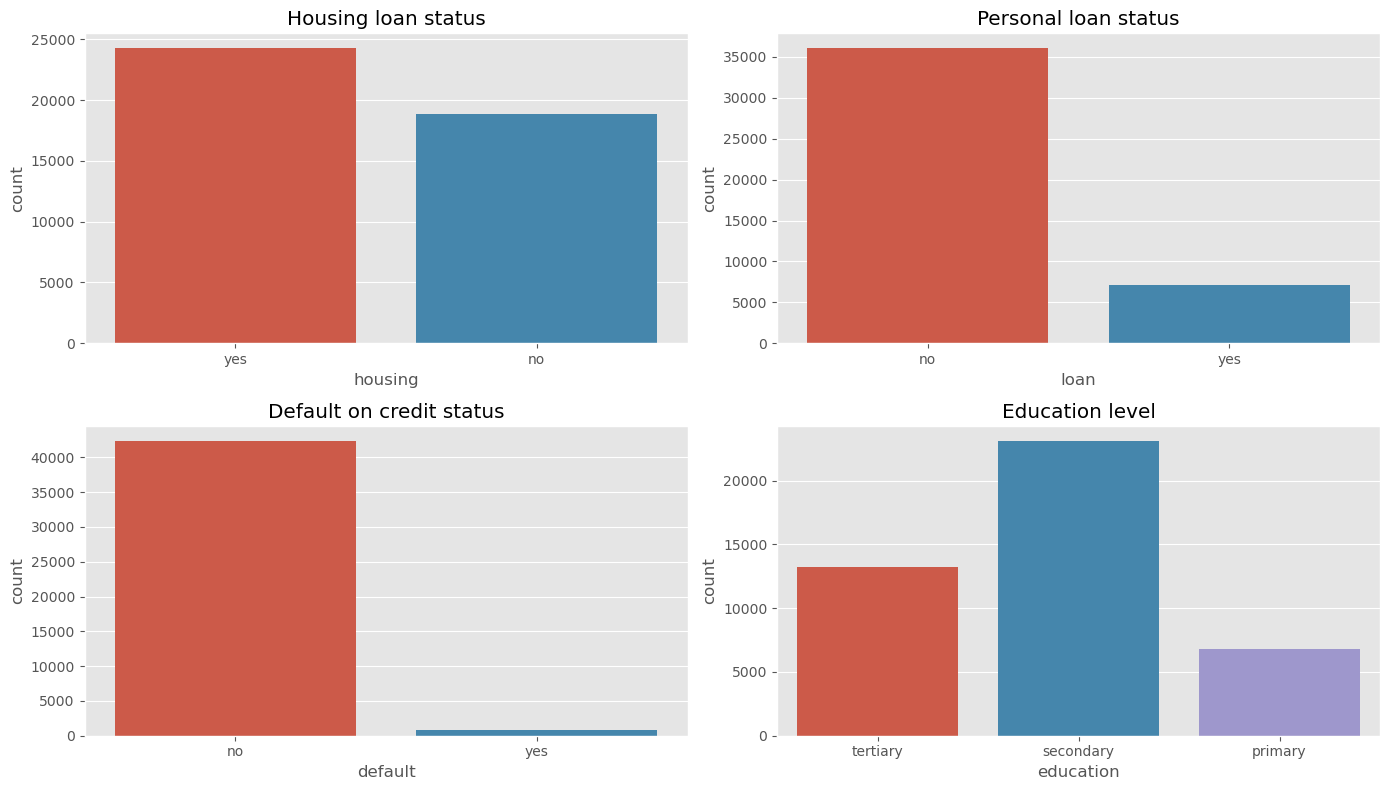

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.countplot(x=new_df_filtered['housing'], ax=axes[0,0])
sns.countplot(x=new_df_filtered['loan'], ax=axes[0,1])
sns.countplot(x=new_df_filtered['default'], ax=axes[1,0])
sns.countplot(x=new_df_filtered['education'], ax=axes[1,1])

axes[0,0].set_title('Housing loan status')
axes[0,1].set_title('Personal loan status')
axes[1,0].set_title('Default on credit status')
axes[1,1].set_title('Education level')

plt.tight_layout()
plt.show()

# Data Methods/Modelling/Techniques: 

The models being used to predict accuracy of the bank’s telemarketing campaign will be binary logistic regression and Random Forest. Logistic regression is a statistical modelling technique that helps predict binary and multiclass classification problems outcomes through use of probabiliities of certain events via predictors. The predictors and their respective coefficients determine the ‘odds’ of success or failure based on the influence of unit decrease or increase of certain predictors as 1 percent unit change in the outcome. Since the data's response is binary (yes and no), this will be a good initial attempt to use real customer data to determine likelihood of success. The interested features will be standardized and encoded respectively then split into training and test sets for the model fitting to take effect. Random forests or random decision forests are an ensemble learning method for either classification or regression purposes. This method incorporates contsructing clusters of decision trees at training the data then outputting the class that is the most frequent of those classes (classification) or mean prediction (regression) of individual trees. Both models will outline the response as binary classification i.e. Yes and No against the aforementioned customer  demographic features. Random forests can simulate clusters of decision trees that can predict successful classfications. The confusion matrices does not indicate significant levels of multicollinearity thus won't need to add interaction effects or other transformations. The problem currently is that response classification is still imbalanced so Stratified Shuffle spliting will be used on the data set in a fashion similar to SMOTE. Stratified splitting preserves class distribution in both the training and testing sets when fitting it into the models compared to smote.

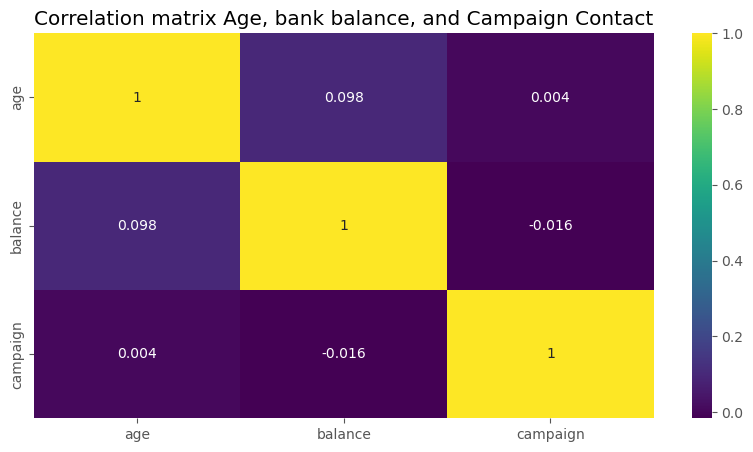

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numeric columns only
numeric_columns = new_df_filtered.select_dtypes(include=['int64'])

plt.figure(figsize=(10, 5))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
plt.title("Correlation matrix Age, bank balance, and Campaign Contact")
plt.show()

C:\Users\14699\AppData\Local\Temp\ipykernel_9220\2898038694.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df_encoded.corr(), annot=True, cmap='plasma')


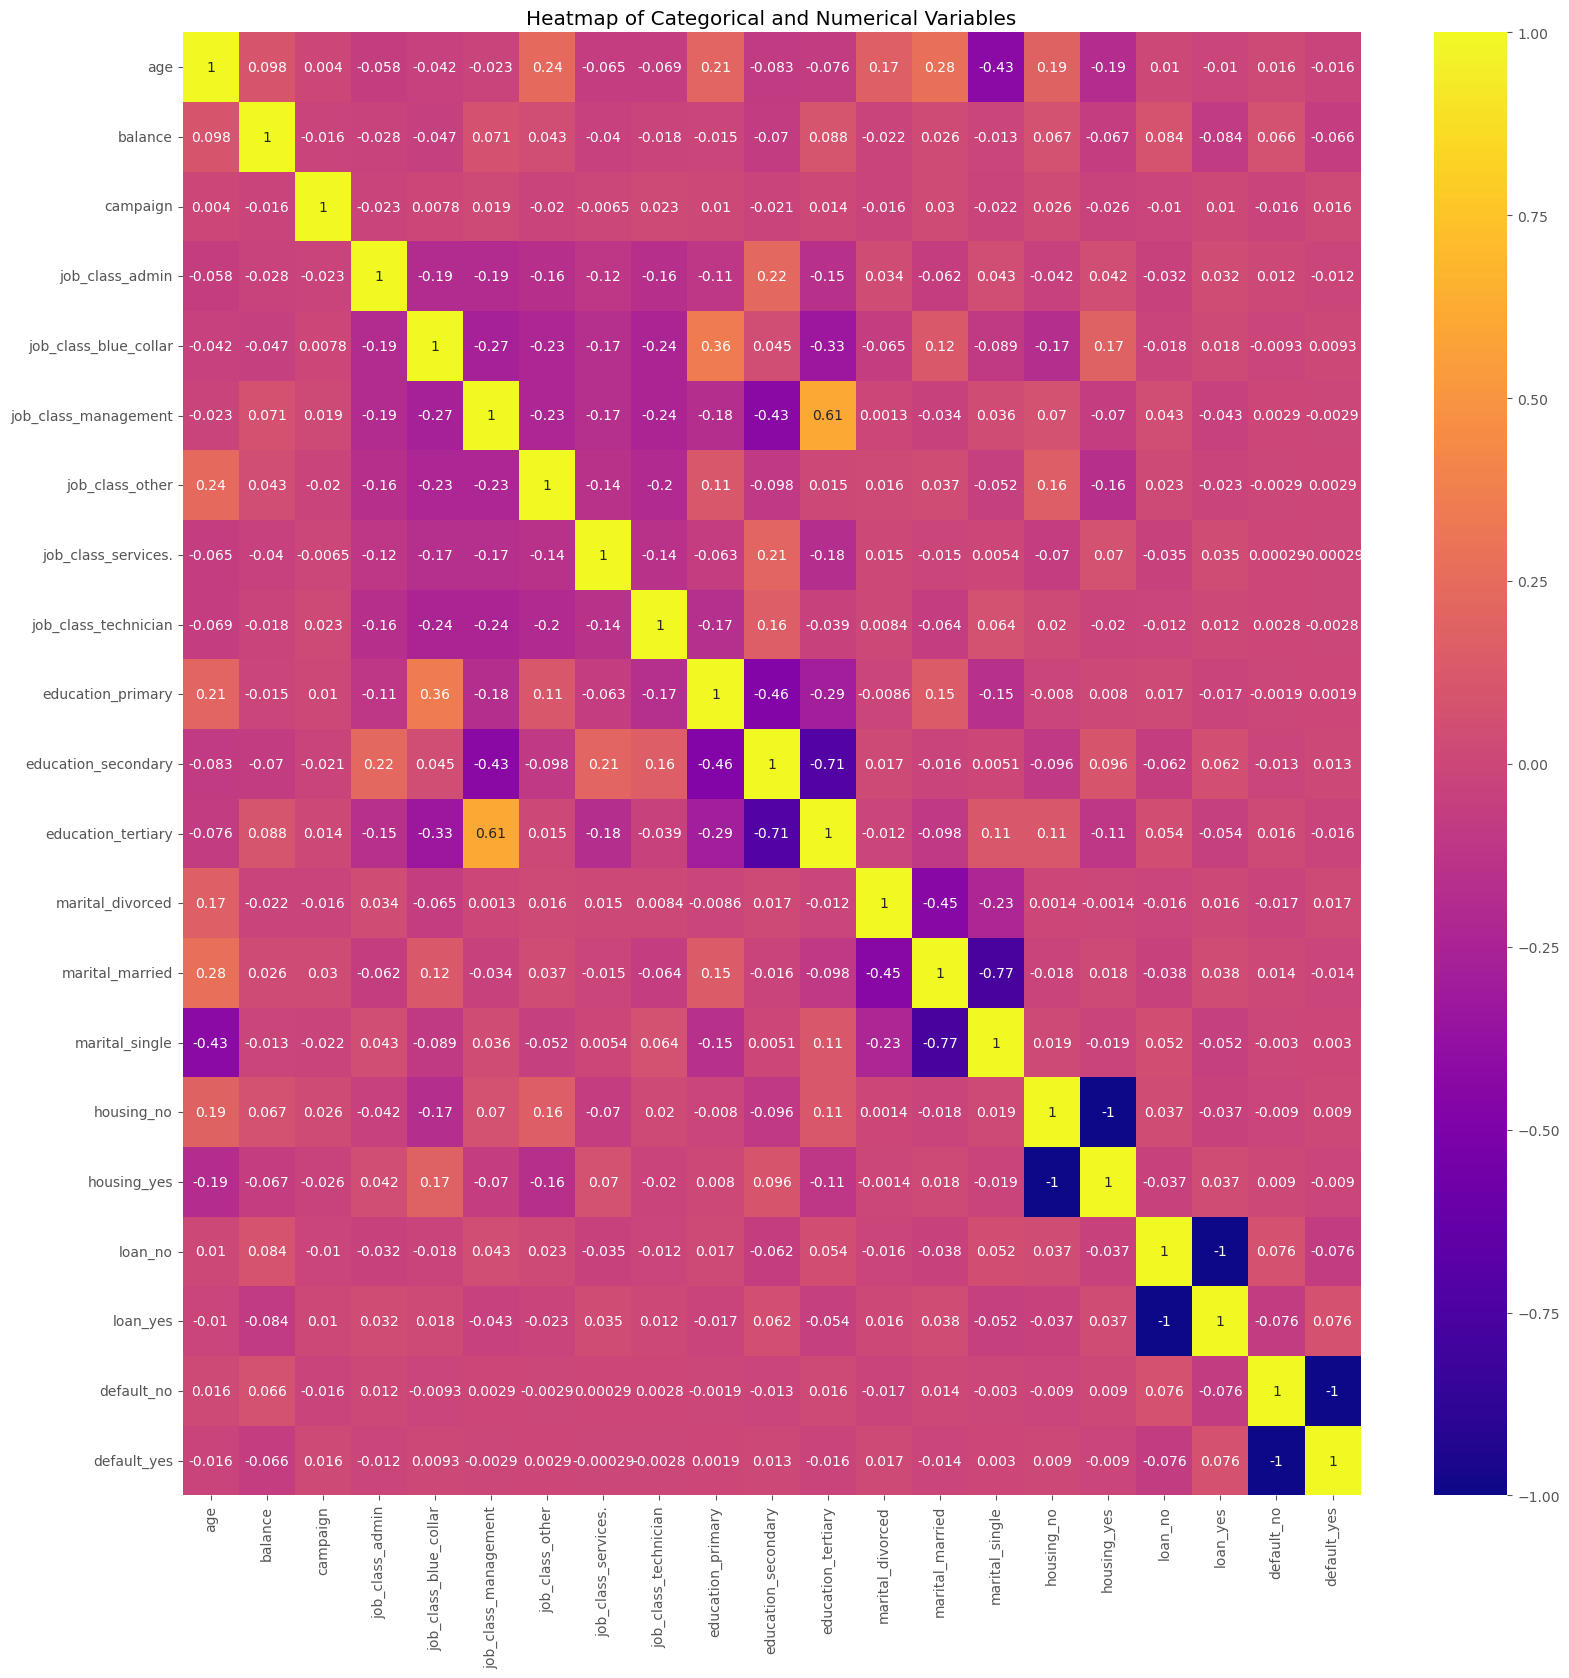

In [18]:
#Perform one-hot encoding on categorical variables (Not)
new_df_encoded = pd.get_dummies(new_df_filtered, columns=['job_class', 'education','marital' , 'housing' , 'loan' , 'default'])

plt.figure(figsize=(19,19))
#Create a heatmap of correlations between numerical and one-hot encoded variables
sns.heatmap(new_df_encoded.corr(), annot=True, cmap='plasma')
plt.title('Heatmap of Categorical and Numerical Variables')
plt.show()

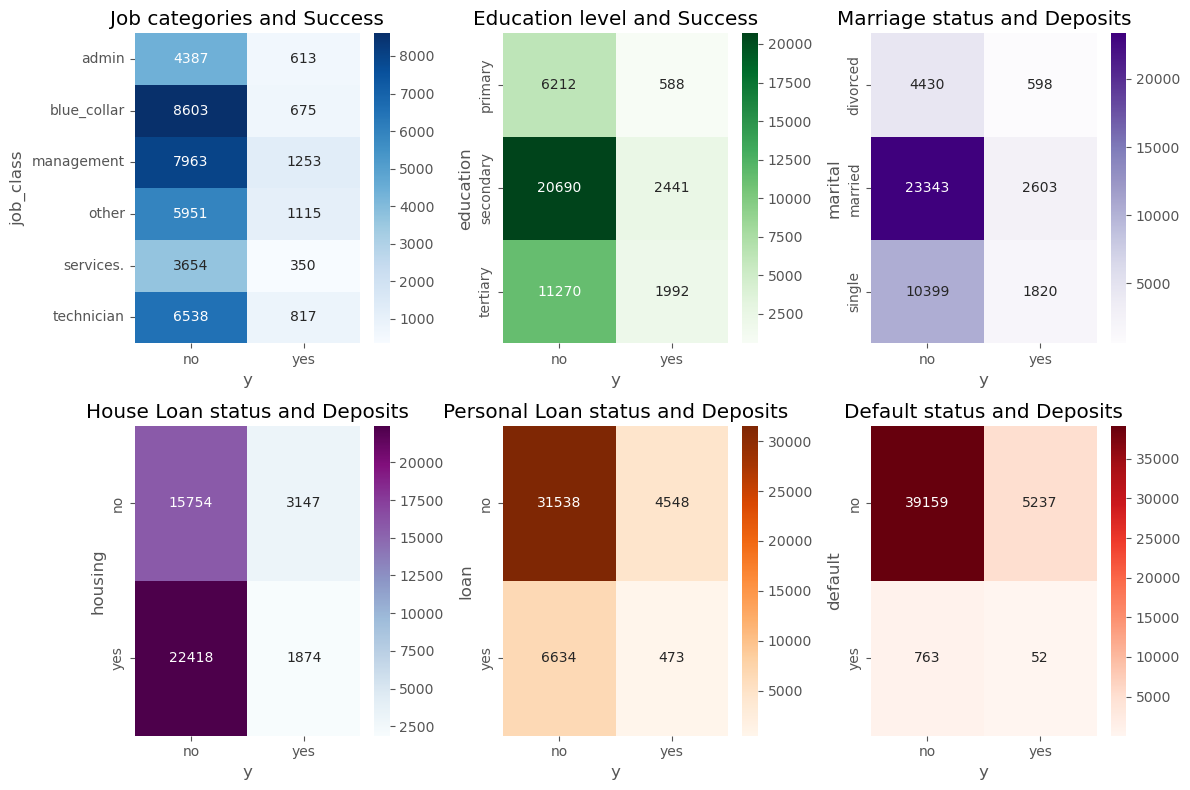

In [23]:

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 row, 3 columns

job_cross_tab = pd.crosstab(new_df_filtered['job_class'], df['y'])
ed_cross_tab = pd.crosstab(new_df_filtered['education'], df['y'])
mar_cross_tab = pd.crosstab(new_df_filtered['marital'], df['y'])
hous_loan_cross_tab = pd.crosstab(new_df_filtered['housing'], df['y'])
pers_loan_cross_tab = pd.crosstab(new_df_filtered['loan'], df['y'])
def_cross_tab = pd.crosstab(new_df['default'], df['y'])

# Plot the first heatmap
sns.heatmap(job_cross_tab, ax=axs[0,0], fmt='d', cmap='Blues', annot=True)
axs[0,0].set_title('Job categories and Deposits')

# Plot the second heatmap
sns.heatmap(ed_cross_tab, ax=axs[0,1], fmt='d', cmap='Greens', annot=True)
axs[0,1].set_title('Education level and Deposits')

# Plot the third heatmap
sns.heatmap(mar_cross_tab, ax=axs[0,2], fmt='d', cmap='Purples', annot=True)
axs[0,2].set_title('Marriage status and Deposits')

sns.heatmap(hous_loan_cross_tab, ax=axs[1,0], fmt='d', cmap='BuPu', annot=True)
axs[1,0].set_title('House Loan status and Deposits')

# Plot the second heatmap
sns.heatmap(pers_loan_cross_tab, ax=axs[1,1], fmt='d', cmap='Oranges', annot=True)
axs[1,1].set_title('Personal Loan status and Deposits')

# Plot the third heatmap
sns.heatmap(def_cross_tab, ax=axs[1,2], fmt='d', cmap='Reds', annot=True)
axs[1,2].set_title('Default status and Deposits')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Outcome')

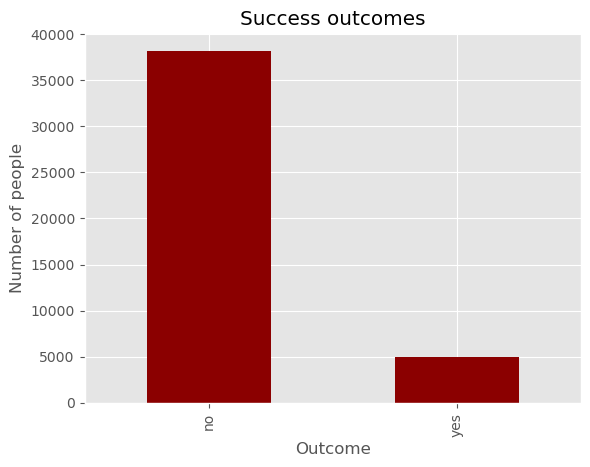

In [20]:
succ_val_count = new_df_filtered['y'].value_counts()
succ_val_count.plot(kind='bar', color='darkred')
plt.title("Success outcomes")
plt.ylabel("Number of people")
plt.xlabel("Outcome")

# RESULTS:

After configuring the parameters of both models, the logistic regression and random forest models did not reach all of the sufficient evaulation metrics to currently predict customers' decisions to sign for a deposit but was able to accurately predict if customers will deny signing a deposit. Success of the models was assessed in terms of the 3 metrics: Accuracy, Precision, and AUC-ROC curve. Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset thus the overall correctness across all classes. This measurement shows how well the model is performing across all classes. However, it may not be the best metric for imbalanced datasets even doing stratified splitting or SMOTE. Precision is the ratio of correctly predicted positive instances to the total predicted positive instances. It measures the accuracy of the positive predictions made and important when the cost of false positives is high. The ROC curve is a graphical representation of the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) at various threshold settings for a binary classification model. This assesses the trade-off between true positive rate and false positive rate. A higher area under the ROC curve (AUC-ROC) indicates a better-performing model. It's particularly useful for comparing the performance of different models or for choosing an optimal threshold for classification. The Random forest model had better performance over precision and accuracy but does not yield a better AUC-ROC curve than the logistic regression. Though both coudldn't quite measure the positive success rate, their precision measurements for the negative success rate were high enough. Overall the findings regarding these methods will not be sufficient despite and may not be useful to the client. 

## Logistic Regression with Stratified Shuffled Splitting

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Making a new binary variable based on Success and failure 
new_df_filtered['Success_outcome'] = new_df_filtered['y'].map({'yes': 1, 'no': 0})

# Split data into features and target variables from the original filtered dataset
X = new_df_filtered.drop(columns=['Success_outcome','y', 'job'], axis=1)
y = new_df_filtered['Success_outcome']

### STEP 1: Stratify shuffle the dataset first ####

### Could be another way to train and split the data set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(split.split(X, y))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

## STEP 2: make a preprocessing step that standardizes the numerical variables and uses one hot keys for categorical variables
numerical_cols = ['age', 'campaign', 'balance']
categorical_cols = ['job_class', 'marital', 'housing', 'loan', 'default', 'education']

# Define preprocessing steps for numerical and categorical variables
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

# Combine preprocessing steps for all columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

###  Step 3: Create a pipeline with preprocessing and Logistic Regression with some hyperparameter of class_weight = 'balanced'
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy}')

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred_log))

Accuracy: 0.6163907859705985
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      7635
           1       0.18      0.64      0.28      1004

    accuracy                           0.62      8639
   macro avg       0.55      0.63      0.51      8639
weighted avg       0.84      0.62      0.69      8639



C:\Users\14699\AppData\Local\Temp\ipykernel_9220\2345667281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['Success_outcome'] = new_df_filtered['y'].map({'yes': 1, 'no': 0})


ROC AUC Score: 0.6281309601150081


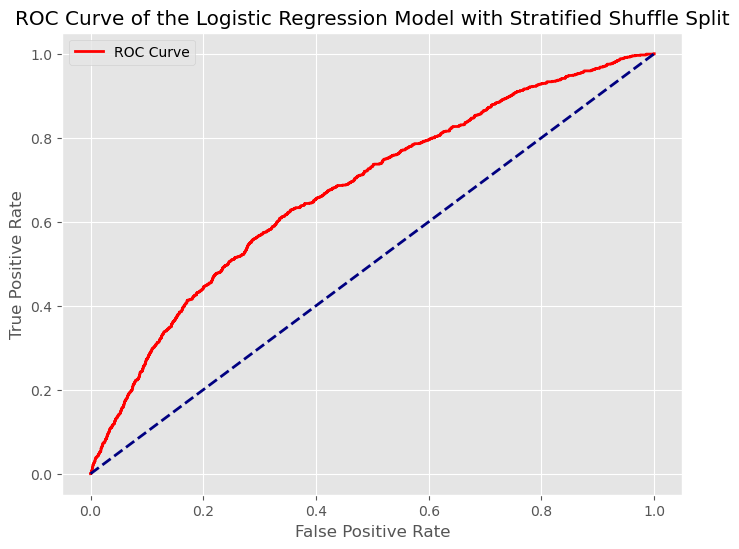

In [22]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_proba = pipeline.predict_proba(X_test)[:, 1] 

roc_auc = roc_auc_score(y_test, y_pred_log)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Logistic Regression Model with Stratified Shuffle Split')
plt.legend()
plt.show()

## RANDOM FOREST METHOD Results

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = new_df_filtered.drop(columns=['Success_outcome','y', 'job'], axis=1)
y = new_df_filtered['Success_outcome']

# Visualizing Random forest
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(split.split(X, y))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

## STEP 2: make a preprocessing step that standardizes the numerical variables and uses one hot keys for categorical variables
numerical_cols = ['age', 'campaign', 'balance']
categorical_cols = ['job_class', 'marital', 'housing', 'loan', 'default', 'education']

# Define preprocessing steps for numerical and categorical variables
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

# Combine preprocessing steps for all columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

###  Step 3: Create a pipeline with preprocessing and Logistic Regression with some hyperparameter of class_weight = 'balanced'
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestClassifier(random_state=42))
])


pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8741752517652506
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7635
           1       0.41      0.19      0.26      1004

    accuracy                           0.87      8639
   macro avg       0.65      0.58      0.59      8639
weighted avg       0.84      0.87      0.85      8639



ROC AUC Score: 0.5758782812430696


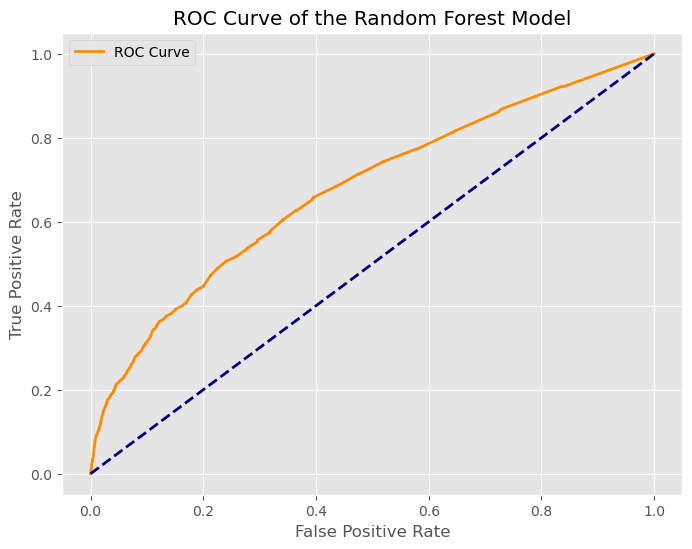

In [39]:
## AUC-ROC Curve and Graph

y_proba = pipeline.predict_proba(X_test)[:, 1] 

roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Random Forest Model')
plt.legend()
plt.show()

# CONCLUSION:
·       Summarized the findings of the report.
·       How this will benefit people.
·       Where future research could go.

 The current conclusion is neither the logistic regression nor random forest models held significant predictive performance on customer data at the desired level. The accuracy, F1, and other performance metrics weren't quite sufficient enough to ensure that. AUC-ROC curve did not favorably indicate neither of the models' predictive efficacy due to some heuristic of the data as can be yet explored. After delving extensively with the data there might be other useful methods to classify these outcomes more accurately. Even though the results were not favorable, more research methods are being developed to accommadate for this kind of work for classfication algorithms as well as developing other machine learning modules for these types of problems. The findings here help people in marketing can use these metrics to better assess what kind of factors that they want to focus on to obtain more potential customers. The data can't exactly be predicted 

# REFERENCES

[1] Moro, Sérgio et al. “A data-driven approach to predict the success of bank telemarketing.” Decis. Support Syst. 62 (2014): 22-31.

[2] Ziko, Imtiaz Masud et al. “Clustering with Fairness Constraints: A Flexible and Scalable Approach.” ArXiv abs/1906.08207 (2019): n. pag.

[3] Bera, Suman Kalyan et al. “Fair Algorithms for Clustering.” ArXiv abs/1901.02393 (2019): n. pag.

[4] Klymshyn, John. "Telemarketing Success for Small and Mid-sized Firms". Publisher, Year.

[5] Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

# Appendix



In [39]:
          ### Reading the data and checking for NA in data and checking for any EDA and other traits
          ### Will now start hiding the code when exporting to html

#from pandas import read_csv

#df = read_csv('port_bank_data.csv', sep = ";")
#columns_to_drop = ['day', 'month', 'duration', 'pdays', 'previous', 'poutcome', 'contact']
#new_df = df.drop(columns=columns_to_drop, axis=1)
#new_df.info()
#new_df.describe()

In [ ]:
             # getting unique values for each categorical variable necessary: Job, education, housing, loan, contact
                                              # using this function
#def unique(list1):
#    unique_list = [] # initialize a null list
#    for x in list1:    
#        if x not in unique_list:
#            unique_list.append(x)
#    for x in unique_list:
#        print(x)
        
#print(unique(new_df['job']))

In [8]:
# Newly filtered dataset
# Define the values to drop and the columns to check
drop_val = ['unknown', 'None']
col_to_check = ['job', 'education']

# Create a boolean mask for rows to drop
mask = ~(new_df[col_to_check].isin(drop_val)).any(axis=1)

# Apply the mask to filter the DataFrame
new_df_filtered = new_df[mask]

### Exploratory Data Analysis via some Histograms, Box plots (some), Pie chart,  Heat map, Pairplot/Correlation matrix 

(1.) Histograms/Bar Graphs
1. job type - 'job' (Categorical)
2. Education level - 'education' (Categorical) (Ordinal)
3. Has housing loan - 'housing' (Categorical)
4. Defaulted on credit/loan - 'default' (Categorical)
5. Age - 'age' (numerical) (integer) 
6. Balance in bank account - 'balance' (numerical) (float)
7. 'campaign' - which is # of times potential customer been contacted (Numerical) (integet
8. Marital Status - 'marital' (Categorical)
9. Has personal loan - 'loan'


In [ ]:
      # For more successful outcomes, we will be omitting the unknown outcome due to interfering effect in classfication
    # and logistic regression methods. We will be trimming the entries that only have outcome of Yes and No so that it's better undertsood

#import matplotlib.pyplot as plt 
#import numpy as np 
#import math
#import seaborn as sns
#from matplotlib import style

                                        # Histogram for jobs with labels

#value_counts = new_df_filtered['job'].value_counts()

#plt.figure(figsize=(12,10))
#value_counts.plot(kind='bar', color='darkblue')
#plt.xticks(rotation=45)
#plt.title("Job density distribution")
#lt.ylabel("Number of people")
#plt.xlabel("Type of Job")

#plt.show()

In [27]:
    # Must alter the jobs category by combining the last few columns because those groups may not be statistically significant
    # Will need to be grouped together to offset the imbalanced data.
    # Using a map function to reclassify the last 6 minority categories as 'other'
    # Define a mapping of current classifications to desired classifications


#classification_map = {'retired': 'other', 'self-employed': 'other', 'entrepreneur' : 'other', 'housemaid': 'other',
#                      'student': 'other', 'blue-collar' : 'blue_collar', 'management': 'management', 'technician': 'technician',
#                      'admin.': 'admin', 'services': 'services.'}

                      # Use the map function to create a new column 'GenderCode' based on the mapping
#new_df_filtered['job_class'] = new_df_filtered['job'].map(classification_map)

#job_value_counts = new_df_filtered['job_class'].value_counts()

                    # we will be using this classfication from now on and we'll be dropping the original

#plt.figure(figsize=(12,10))
#job_value_counts.plot(kind='bar', color='lightblue')
#plt.title("Job class density count")
#plt.ylabel("Number of people")
#plt.xlabel("Job classification")


In [28]:
                        ## Graphs for Age, Campaign contact, Bank balance, and Marriage Status

#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

                                             # Subplot 1: Histogram with age

#agefig = axes[0,0] # Storing the placed graph for this coordinate
#style.use('ggplot')

#bins = [18, 24, 30, 36, 42, 46, 52, 58, 64, 70, 76, 82, 88, 96]
#agefig.hist(new_df_filtered['age'], bins=bins, color='purple') 
#agefig.set_ylabel('Number of people per age group')
#agefig.set_xlabel('Age brackets')
#agefig.title.set_text('Age Distribution')

                                     # Subplot 2: Histogram with Campaign Contact number
#contfig = axes[0,1]
#bins = [1,2,3,4,5,6,7,8,9,10,11,12]
#contfig.hist(new_df_filtered['campaign'], bins=bins, color='blue')
#contfig.set_xlabel('Number of times contacted towards a customer')
#contfig.title.set_text('Number of times contacted per potential customer')

                                     # Subplot 3: Bank balance Histogram

#bankbalfig = axes[1,0]
#brackets = [-3000, -2000, -1000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 14000]
#bankbalfig.hist(new_df_filtered['balance'], bins=brackets, color='darkgreen')
#bankbalfig.set_ylabel('Number of people per bank balance bracket')
#bankbalfig.set_xlabel('Bank balance brackets (in Euros)')
#bankbalfig.title.set_text('Bank balance distribution')


                                     # Subplot 4: Marital Status Bar Graph
#marriagefig = axes[1,1]
#sns.countplot(x=new_df_filtered['marital'], ax=axes[1,1])
#marriagefig.set_title('Education level')
#marriagefig.title.set_text("Density of marriage status")
#marriagefig.set_xlabel("Marriage status")
#marriagefig.set_ylabel("Number of people per cateogory")

#plt.tight_layout()
#plt.show()

In [30]:
                                            ## Correlation Matrix for the Numerical Variables
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

                                                # Select numeric columns only
#numeric_columns = new_df_filtered.select_dtypes(include=['int64'])

#plt.figure(figsize=(10, 5))
#correlation_matrix = numeric_columns.corr()
#sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
#plt.title("Correlation matrix Age, bank balance, and Campaign Contact")
#plt.show()

In [29]:
                                ## Graphs for Housing loan status, Personal Loan status, Education level, and Default
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

#sns.countplot(x=new_df_filtered['housing'], ax=axes[0,0])
#sns.countplot(x=new_df_filtered['loan'], ax=axes[0,1])
#sns.countplot(x=new_df_filtered['default'], ax=axes[1,0])
#sns.countplot(x=new_df_filtered['education'], ax=axes[1,1])

#axes[0,0].set_title('Housing loan status')
#axes[0,1].set_title('Personal loan status')
#axes[1,0].set_title('Default on credit status')
#axes[1,1].set_title('Education level')

#plt.tight_layout()
#plt.show()

In [31]:
                                ## Correlation matrix for encoded categorical variables and numerical variables

                    #Perform one-hot encoding on categorical variables
#new_df_encoded = pd.get_dummies(new_df_filtered, columns=['job_class', 'education','marital' , 'housing' , 'loan' , 'default'])

#plt.figure(figsize=(19,19))
                    #Create a heatmap of correlations between numerical and one-hot encoded variables
#sns.heatmap(new_df_encoded.corr(), annot=True, cmap='plasma')
#plt.title('Heatmap of Categorical and Numerical Variables')
#plt.show()

In [33]:
                                ## Cross Tabulations for categorical variables with respect to Response
#fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 row, 3 columns

#job_cross_tab = pd.crosstab(new_df_filtered['job_class'], df['y'])
#ed_cross_tab = pd.crosstab(new_df_filtered['education'], df['y'])
#mar_cross_tab = pd.crosstab(new_df_filtered['marital'], df['y'])
#hous_loan_cross_tab = pd.crosstab(new_df_filtered['housing'], df['y'])
#pers_loan_cross_tab = pd.crosstab(new_df_filtered['loan'], df['y'])
#def_cross_tab = pd.crosstab(new_df['default'], df['y'])

# Plot the first heatmap
#sns.heatmap(job_cross_tab, ax=axs[0,0], fmt='d', cmap='Blues', annot=True)
#axs[0,0].set_title('Job categories and Deposits')

# Plot the second heatmap
#sns.heatmap(ed_cross_tab, ax=axs[0,1], fmt='d', cmap='Greens', annot=True)
#axs[0,1].set_title('Education level and Deposits')

# Plot the third heatmap
#sns.heatmap(mar_cross_tab, ax=axs[0,2], fmt='d', cmap='Purples', annot=True)
#axs[0,2].set_title('Marriage status and Deposits')

#sns.heatmap(hous_loan_cross_tab, ax=axs[1,0], fmt='d', cmap='BuPu', annot=True)
#axs[1,0].set_title('House Loan status and Deposits')

# Plot the second heatmap
#sns.heatmap(pers_loan_cross_tab, ax=axs[1,1], fmt='d', cmap='Oranges', annot=True)
#axs[1,1].set_title('Personal Loan status and Deposits')

# Plot the third heatmap
#sns.heatmap(def_cross_tab, ax=axs[1,2], fmt='d', cmap='Reds', annot=True)
#axs[1,2].set_title('Default status and Deposits')

#plt.tight_layout()
#plt.show()

In [32]:
                                            # Distribution of the Response

#succ_val_count = new_df_filtered['y'].value_counts()
#succ_val_count.plot(kind='bar', color='darkred')
#plt.title("Success outcomes")
#plt.ylabel("Number of people")
#plt.xlabel("Outcome")

# Logistic Regression Model with Shuffle splitting code

In [34]:

#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score, classification_report
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer


                            # Making a new binary variable based on Success and failure 
#new_df_filtered['Success_outcome'] = new_df_filtered['y'].map({'yes': 1, 'no': 0})

                    # Split data into features and target variables from the original filtered dataset
#X = new_df_filtered.drop(columns=['Success_outcome','y', 'job'], axis=1)
#y = new_df_filtered['Success_outcome']

                                ### STEP 1: Stratify shuffle the dataset first ####

#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#train_idx, test_idx = next(split.split(X, y))
#X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            ## STEP 2: make a preprocessing step that standardizes the numerical variables and uses one hot keys for categorical variables
#numerical_cols = ['age', 'campaign', 'balance']
#categorical_cols = ['job_class', 'marital', 'housing', 'loan', 'default', 'education']

                        # Define preprocessing steps for numerical and categorical variables
#numeric_transformer = Pipeline(steps=[
#    ('scaler', StandardScaler())])

#categorical_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder())])

                                # Combine preprocessing steps for all columns
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numerical_cols),
#        ('cat', categorical_transformer, categorical_cols)])

                ###  Step 3: Create a pipeline with preprocessing and Logistic Regression with some hyperparameter of class_weight = 'balanced'
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('classifier', LogisticRegression(class_weight='balanced'))
#])

                                        # Fit the pipeline on the training data
#pipeline.fit(X_train, y_train)

                                                # Make predictions on the test data
#y_pred_log = pipeline.predict(X_test)

                                                    # Evaluate model performance
#accuracy = accuracy_score(y_test, y_pred_log)
#print(f'Accuracy: {accuracy}')

                                    # Print classification report for detailed evaluation
#print(classification_report(y_test, y_pred_log))

In [35]:
                            ## AUC-ROC Curve and Graph for the Logistic Regression model

#y_proba = pipeline.predict_proba(X_test)[:, 1] 

#roc_auc = roc_auc_score(y_test, y_pred_rf)
#print("ROC AUC Score:", roc_auc)

#fpr, tpr, _ = roc_curve(y_test, y_proba)
#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve of the Random Forest Model')
#plt.legend()
#plt.show()

# Random Forest Code

In [37]:
                            ## Random Forest Model setup

#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#import matplotlib.pyplot as plt

# Split data into features and target variable
#X = new_df_encoded.drop(columns=['y'], axis=1)
#y = new_df_encoded['y']


#X = new_df_filtered.drop(columns=['Success_outcome','y', 'job'], axis=1)
#y = new_df_filtered['Success_outcome']

                        # Step 1
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#train_idx, test_idx = next(split.split(X, y))
#X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        ## STEP 2: make a preprocessing step that standardizes the numerical variables and uses one hot keys for categorical variables
#numerical_cols = ['age', 'campaign', 'balance']
#categorical_cols = ['job_class', 'marital', 'housing', 'loan', 'default', 'education']

            # Define preprocessing steps for numerical and categorical variables
#numeric_transformer = Pipeline(steps=[
#    ('scaler', StandardScaler())])

#categorical_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder())])

                # Combine preprocessing steps for all columns
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numerical_cols),
#        ('cat', categorical_transformer, categorical_cols)])

            ###  Step 3: Create a pipeline with preprocessing and Logistic Regression with some hyperparameter of class_weight = 'balanced'
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('randomforest', RandomForestClassifier(random_state=42))
#])


#pipeline.fit(X_train, y_train)

                                # Make predictions on the test data
#y_pred_rf = pipeline.predict(X_test)

                                # Evaluate model performance
#accuracy = accuracy_score(y_test, y_pred_rf)
#print(f'Accuracy: {accuracy}')

                    # Print classification report for detailed evaluation
#print(classification_report(y_test, y_pred_rf))

In [38]:
                                    ## AUC-ROC Curve and Graph for Random Forest Model

#y_proba = pipeline.predict_proba(X_test)[:, 1] 

#roc_auc = roc_auc_score(y_test, y_pred_rf)
#print("ROC AUC Score:", roc_auc)

#fpr, tpr, _ = roc_curve(y_test, y_proba)
#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve of the Random Forest Model')
#plt.legend()
#plt.show()

In [ ]:
# WHEN DONE WITH THIS EXECUTE THESE COMMANDS FROM THE TERMINAL to export the html

#jupyter nbconvert --to html --TemplateExporter.exclude_input_tags="hide_code" JL_STAT_650_Final_Project_Report.ipynb
#jupyter nbconvert --to html --TemplateExporter.exclude_markdown_tags="show_code_only" JL_STAT_650_Final_Project_Report.ipynb
